因子分析步骤：
    对所给的数据样本进行标准化处理
    计算样本的相关矩阵R
    求相关矩阵R的特征值、特征向量
    根据系统要求的累积贡献度确定主因子的个数
    计算因子载荷矩阵A
    最终确定因子模型

# 1.导入库

In [19]:
# 数据处理
import pandas as pd
import numpy as np

# 绘图
import seaborn as sns
import matplotlib.pyplot as plt
# 因子分析
from factor_analyzer import FactorAnalyzer

#中文编码处理
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# 2.读取数据

In [4]:
df = pd.read_csv("D:\M\python\主成分_因子分析\居民消费.csv",index_col=0).reset_index(drop=True)
df

,食品烟酒,衣着,居住,生活用品,交通通信,教育文化,医疗保健,其他用品
0,8373.880833,1803.508600,15710.522460,2145.811114,3789.483449,2766.022264,3513.317521,800.728111
1,8516.007564,1711.820707,7035.340948,1669.405706,3778.719068,2253.668286,2645.975583,850.469276
2,4992.478562,1249.668278,4394.498980,1171.228058,2356.860743,1799.066709,1692.018775,381.221646
3,4362.360730,1235.844821,3460.383332,863.855173,1980.874277,1608.441949,1854.012413,366.909392
4,5686.075653,1568.254345,4148.550641,1119.202266,3099.196787,1835.876303,1891.525440,445.807892
5,6110.089520,1378.240348,4473.827668,1091.821781,2660.015578,1950.817597,2303.197015,704.119707
6,5021.599196,1293.872413,3448.206328,906.674739,2385.998621,1742.011020,2031.187504,488.129556
7,5287.171580,1300.570824,3450.712601,895.372975,2122.166709,1602.863889,2023.207724,374.350426
8,11224.717270,1694.020412,15247.340380,2091.216507,4557.451535,3662.911098,3033.384339,1025.252728
9,7258.372863,1450.490162,7505.910054,1522.957133,3588.833100,2298.213127,2018.615599,581.755342


# 3.充分性检验


## 3.1 Bartlett's球状检验
 检验总体变量的相关矩阵是否是单位阵（相关系数矩阵对角线的所有元素均为1,所有非对角线上的元素均为零）；即检验各个变量是否各自独立。
        如果不是单位矩阵，说明原变量之间存在相关性，可以进行因子分子；反之，原变量之间不存在相关性，数据不适合进行主成分分析

In [5]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df)
chi_square_value, p_value

(274.6662110192522, 2.492399236510257e-42)

### p值<0.05时，说明各变量间具有相关性，因子分析有效。

## 3.2 KMO检验
检查变量间的相关性和偏相关性，取值在0-1之间；KOM统计量越接近1，变量间的相关性越强，偏
关性越弱，因子分析的效果越好。
通常取值从0.6开始进行因子分析

In [6]:
#KMO检验
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.8578568010059687

### 通过结果可以看到KMO大于0.6，也说明变量之间存在相关性，可以进行分析

# 4.选择因子个数
方法：计算相关矩阵的特征值，进行降序排列

## 4.1 特征值和特征向量

In [7]:
faa = FactorAnalyzer(25,rotation=None)
faa.fit(df)

# 得到特征值ev、特征向量v
ev,v=faa.get_eigenvalues()
print(ev,v)

[6.24027878 0.7422117  0.37445227 0.22328694 0.17205645 0.11680581
 0.08074068 0.05016738] [ 6.16761972e+00  6.45617898e-01  2.80238034e-01  1.54241615e-01
  1.05841630e-01  3.25751365e-02  3.06836805e-03 -2.19576487e-07]


## 4.2 可视化展示
将特征值和因子个数的变化绘制成图形

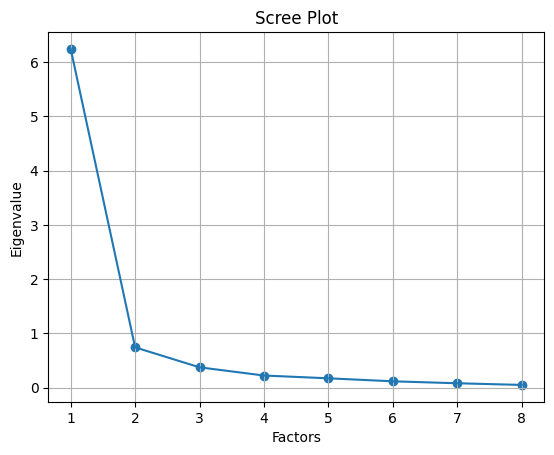

In [8]:
 # 同样的数据绘制散点图和折线图
plt.scatter(range(1, df.shape[1] + 1), ev)
plt.plot(range(1, df.shape[1] + 1), ev)

# 显示图的标题和xy轴的名字
# 最好使用英文，中文可能乱码
plt.title("Scree Plot")
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")

plt.grid()  # 显示网格
plt.show()  # 显示图形

 ### 从上面的图形中，我们明确地看到：选择2或3个因子就可以了

# 5.因子旋转

## 5.1 建立因子分析模型
在这里选择，最大方差化因子旋转

In [9]:
# 选择方式： varimax 方差最大化
# 选择固定因子为 2 个
faa_two = FactorAnalyzer(2,rotation='varimax')
faa_two.fit(df)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

## 5.2 查看因子方差-get_communalities()
查看公因子方差

In [10]:
# 公因子方差
faa_two.get_communalities()

array([0.88903401, 0.86693282, 0.83368161, 0.91170989, 0.81912841,
       0.77173118, 0.6984176 , 0.87219153])

查看每个变量的公因子方差数据

In [11]:
pd.DataFrame(faa_two.get_communalities(),index=df.columns)

,0
食品烟酒,0.889034
衣着,0.866933
居住,0.833682
生活用品,0.911710
交通通信,0.819128
教育文化,0.771731
医疗保健,0.698418
其他用品,0.872192


## 5.3 查看旋转后的特征值

In [12]:
faa_two.get_eigenvalues()

(array([6.24027878, 0.7422117 , 0.37445227, 0.22328694, 0.17205645,
        0.11680581, 0.08074068, 0.05016738]),
 array([ 6.07639225,  0.58643718,  0.16088909,  0.05524202,  0.01314781,
        -0.03553787, -0.06557487, -0.12816856]))

In [13]:
pd.DataFrame(faa_two.get_eigenvalues())

,0,1,2,3,4,5,6,7
0,6.240279,0.742212,0.374452,0.223287,0.172056,0.116806,0.080741,0.050167
1,6.076392,0.586437,0.160889,0.055242,0.013148,-0.035538,-0.065575,-0.128169


 ## 5.4 查看成分矩阵
 查看它们构成的成分矩阵

In [14]:
# 变量个数*因子个数
faa_two.loadings_

array([[0.9196057 , 0.20822914],
       [0.24877304, 0.89724288],
       [0.77799582, 0.47791643],
       [0.75213378, 0.58822162],
       [0.7497348 , 0.50697746],
       [0.77452924, 0.41453062],
       [0.46300493, 0.69573273],
       [0.65683016, 0.66390186]])

如果转成DataFrame格式，index就是我们的变量，columns就是指定的因子factor。转DataFrame格式后的数据：

In [15]:
pd.DataFrame(faa_two.loadings_,index=df.columns)

,0,1
食品烟酒,0.919606,0.208229
衣着,0.248773,0.897243
居住,0.777996,0.477916
生活用品,0.752134,0.588222
交通通信,0.749735,0.506977
教育文化,0.774529,0.414531
医疗保健,0.463005,0.695733
其他用品,0.656830,0.663902


## 5.5 查看因子贡献率
通过理论部分的解释，我们发现每个因子都对变量有一定的贡献，存在某个贡献度的值，在这里查看3个和贡献度相关的指标：
总方差贡献：variance (numpy array) – The factor variances
方差贡献率：proportional_variance (numpy array) – The proportional factor variances
累积方差贡献率：cumulative_variances (numpy array) – The cumulative factor variances

In [16]:
faa_two.get_factor_variance()

(array([3.88634262, 2.77648443]),
 array([0.48579283, 0.34706055]),
 array([0.48579283, 0.83285338]))

 # 6.隐藏变量可视化
为了更直观地观察每个隐藏变量和哪些特征的关系比较大，进行可视化展示，为了方便取上面相关系数的绝对值：

In [17]:
df1 = pd.DataFrame(np.abs(faa_two.loadings_),index=df.columns)
print(df1)

             0         1
食品烟酒  0.919606  0.208229
衣着    0.248773  0.897243
居住    0.777996  0.477916
生活用品  0.752134  0.588222
交通通信  0.749735  0.506977
教育文化  0.774529  0.414531
医疗保健  0.463005  0.695733
其他用品  0.656830  0.663902


热力图绘制系数矩阵

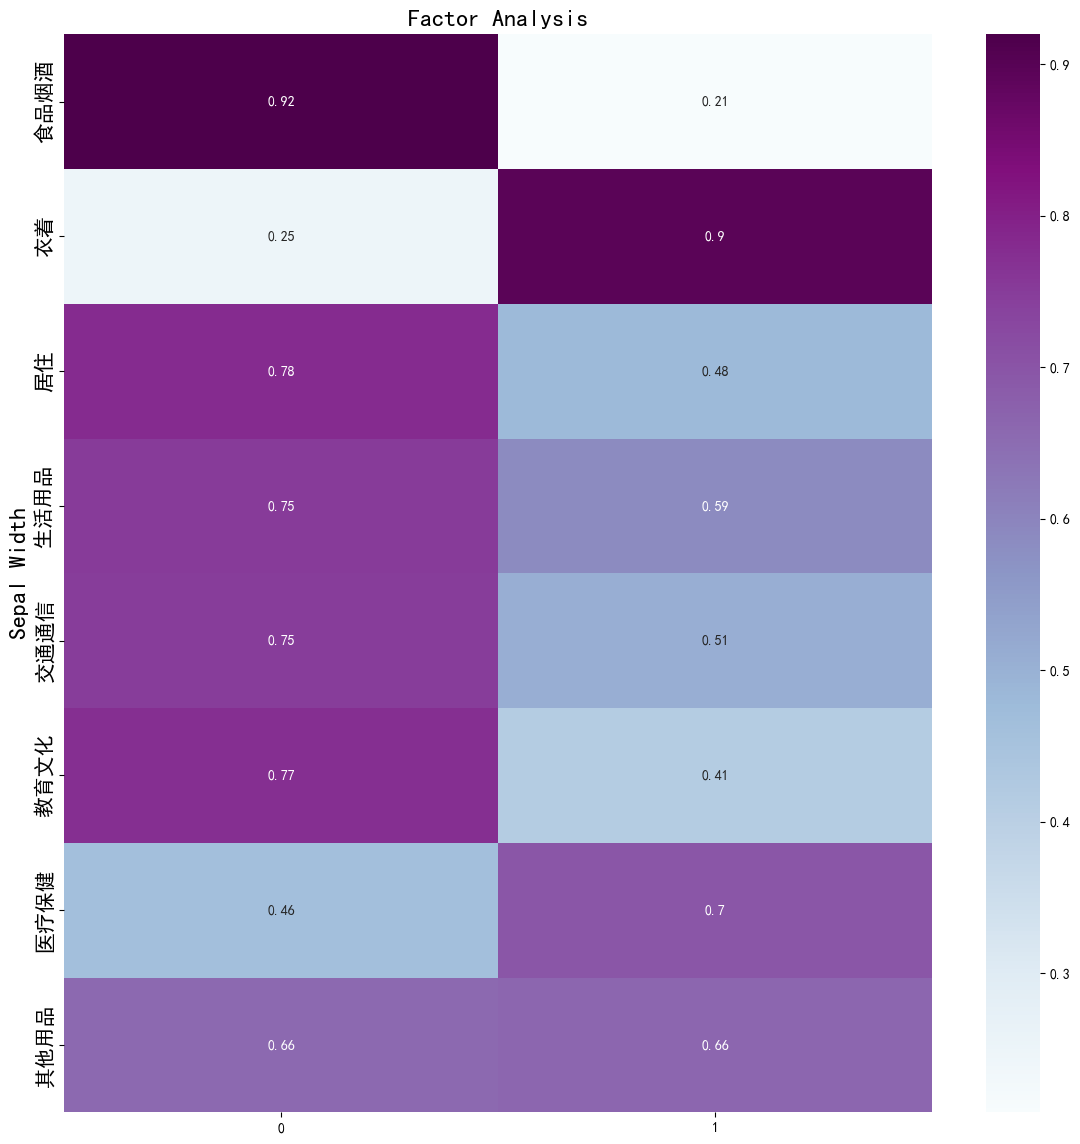

In [20]:
# 绘图

plt.figure(figsize = (14,14))
ax = sns.heatmap(df1, annot=True, cmap="BuPu")

# 设置y轴字体大小
ax.yaxis.set_tick_params(labelsize=15)
plt.title("Factor Analysis", fontsize="xx-large")

# 设置y轴标签
plt.ylabel("Sepal Width", fontsize="xx-large")
# 显示图片
plt.show()

# 保存图片
# plt.savefig("factorAnalysis", dpi=500)

# 7.转成新变量
上面我们已经知道了2个因子比较合适，可以将原始数据转成2个新的特征，具体转换方式为

In [21]:
faa_two.transform(df)

array([[ 1.40654509,  2.07424457],
       [ 0.7699732 ,  1.46264895],
       [-0.64094201,  0.19856785],
       [-1.21907618,  0.23180561],
       [-0.72928975,  0.78994677],
       [-0.43569521,  0.90418181],
       [-0.93716465,  0.43974781],
       [-0.91257723,  0.10415935],
       [ 2.76624641,  1.34810217],
       [ 0.60271826,  0.53155701],
       [ 1.2973717 ,  1.0485455 ],
       [-0.19484721, -0.46659452],
       [ 0.99804522, -0.75434968],
       [-0.1492984 , -0.95927593],
       [-0.10738477,  0.74598787],
       [-1.03338872,  0.33984604],
       [-0.18912754, -0.43473191],
       [ 0.14315307, -0.02247447],
       [ 2.15826576, -1.23529437],
       [ 0.3082692 , -2.00936759],
       [ 0.88649906, -2.30056983],
       [ 0.23196803,  0.41805437],
       [ 0.21738979, -0.45622898],
       [-0.64044041, -0.78510483],
       [-0.12349301, -1.0842902 ],
       [-1.18114713, -0.44451271],
       [-0.59603616,  0.06341618],
       [-0.78426672, -0.06307448],
       [-0.58231412,

转成DataFrame格式后数据展示效果更好：

In [22]:
df2 = pd.DataFrame(faa_two.transform(df))
print(df2)

           0         1
0   1.406545  2.074245
1   0.769973  1.462649
2  -0.640942  0.198568
3  -1.219076  0.231806
4  -0.729290  0.789947
5  -0.435695  0.904182
6  -0.937165  0.439748
7  -0.912577  0.104159
8   2.766246  1.348102
9   0.602718  0.531557
10  1.297372  1.048545
11 -0.194847 -0.466595
12  0.998045 -0.754350
13 -0.149298 -0.959276
14 -0.107385  0.745988
15 -1.033389  0.339846
16 -0.189128 -0.434732
17  0.143153 -0.022474
18  2.158266 -1.235294
19  0.308269 -2.009368
20  0.886499 -2.300570
21  0.231968  0.418054
22  0.217390 -0.456229
23 -0.640440 -0.785105
24 -0.123493 -1.084290
25 -1.181147 -0.444513
26 -0.596036  0.063416
27 -0.784267 -0.063074
28 -0.582314  0.235066
29 -0.734376  0.324345
30 -0.595580 -0.244354
